In [3]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

# Encoding in 2 dimension 

In [4]:

one_hot("amazing restaurant",30)

[17, 28]

In [5]:
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
print(encoded_reviews)

[[20, 3], [17, 28], [5, 21], [5, 24, 5], [29, 8, 7], [23, 3], [28, 8, 4], [19, 15], [19, 3], [23, 29]]


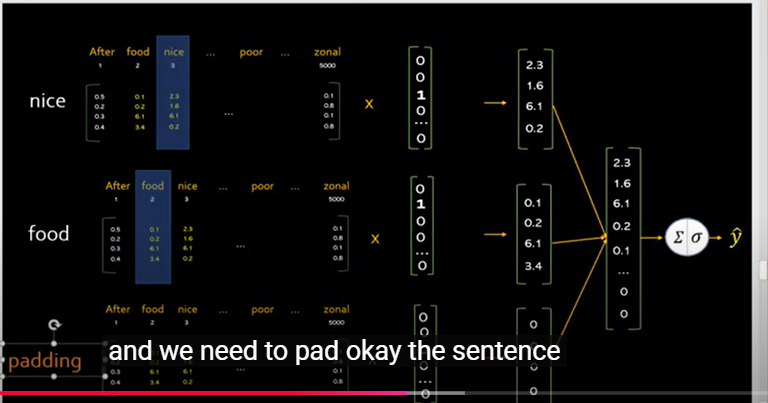


#  Add padiing

In [6]:

max_length = 4
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[20  3  0  0]
 [17 28  0  0]
 [ 5 21  0  0]
 [ 5 24  5  0]
 [29  8  7  0]
 [23  3  0  0]
 [28  8  4  0]
 [19 15  0  0]
 [19  3  0  0]
 [23 29  0  0]]


In [7]:
embeded_vector_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

C:\Users\rakes\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
X = padded_reviews
y = sentiment

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
model.fit(X, y, epochs=50, verbose=0)

In [11]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 1.0000 - loss: 0.6187


1.0

In [12]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

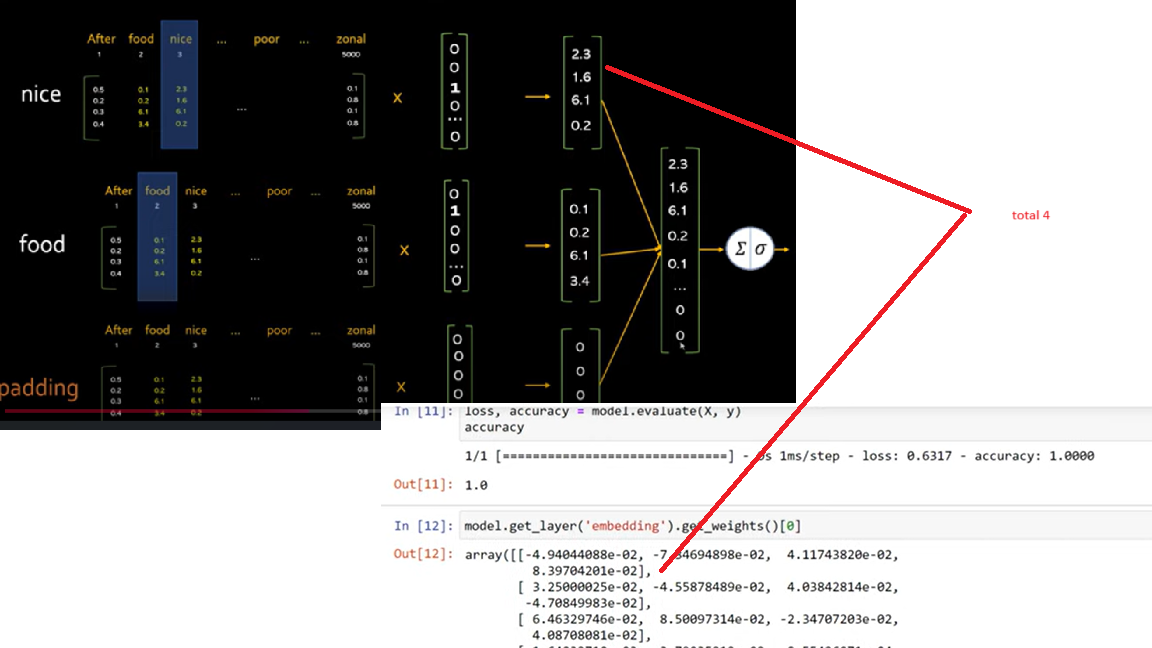

In [16]:
weights

array([[-0.02908686, -0.04187086, -0.03778332, -0.01354098, -0.03635568],
       [-0.0450192 , -0.00499722,  0.01294886,  0.00118319, -0.00768774],
       [ 0.00197669, -0.03126847, -0.02842196,  0.04860711, -0.01812762],
       [ 0.01092184,  0.06281656, -0.01796916, -0.00329658, -0.03697117],
       [ 0.05947469, -0.0551107 ,  0.05815689,  0.05622856, -0.01239966],
       [-0.11715155,  0.07418767, -0.036169  , -0.10478559,  0.00129035],
       [ 0.03448422, -0.03485043,  0.02855105, -0.03924842,  0.02477253],
       [-0.09542964,  0.02928185, -0.09826022, -0.07452817,  0.02002923],
       [ 0.04295396, -0.0232143 , -0.01909458,  0.03817583, -0.01237435],
       [ 0.03548576, -0.0168981 ,  0.03696691, -0.0451226 , -0.02448705],
       [ 0.00151349, -0.00974805,  0.04271144,  0.02510354,  0.02506967],
       [ 0.0082224 , -0.03871173, -0.01484841,  0.01016053, -0.02668035],
       [-0.00660121, -0.01199027, -0.0211728 ,  0.00061182, -0.04275363],
       [-0.02408841,  0.02828583,  0.0

In [13]:
weights[13]

array([-0.02408841,  0.02828583,  0.03473408, -0.0230062 , -0.04701523],
      dtype=float32)

In [14]:
weights[4]

array([ 0.05947469, -0.0551107 ,  0.05815689,  0.05622856, -0.01239966],
      dtype=float32)

In [15]:
weights[16]

array([-0.01199876, -0.02780287,  0.00299258,  0.01880201,  0.03392613],
      dtype=float32)